In [4]:
import pandas as pd
file_path = "heart-dataset.csv"  
df = pd.read_csv(file_path)
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0 

In [5]:
print(df.isnull().sum())
print("Duplicate rows:",df.duplicated().sum())          #shreesh data, add krdo, make change accordingly
print(df.dtypes)
print(df.describe())                                    #shreesh ka data, check ones again
                                                        #Anurag kE laptop me data send, help in anaLysis


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Duplicate rows: 1
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000

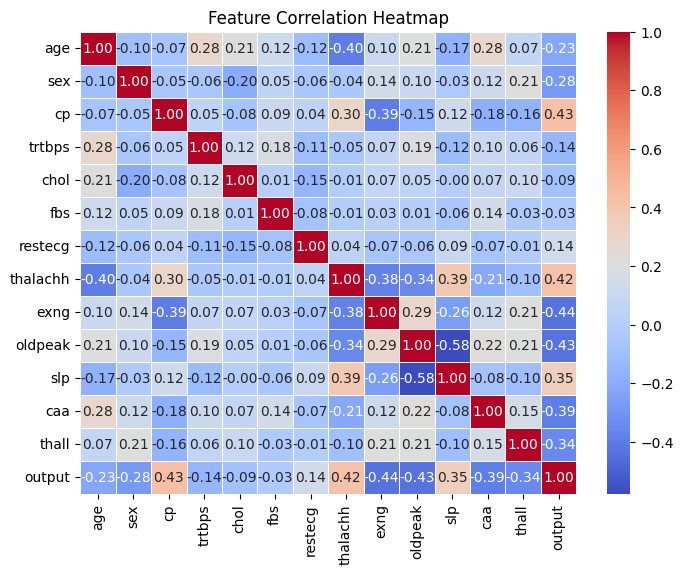

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df.corr()                                    #shreesh's data, ones again check mj
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap for original dataset, #our doctor")
plt.show()


In [7]:
print(df.columns)

# mj add krdo after transmitting data                                      
#df["Cardio_Stress"] = df["trtbps"] / df["thalachh"]                      
#df["Oxygen_Efficiency"] = df["SpO2"] * df["restecg"]

df = df.drop(columns=["chol", "fbs", "caa", "thall"])
print(df.info())                                                # mj plz let this be added to ANURAG's plan, to have overall analysis MJ


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'Cardio_Stress'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trtbps         303 non-null    int64  
 4   restecg        303 non-null    int64  
 5   thalachh       303 non-null    int64  
 6   exng           303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   slp            303 non-null    int64  
 9   output         303 non-null    int64  
 10  Cardio_Stress  303 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 26.2 KB
None
   age  sex  cp  trtbps  restecg  thalachh  exng  oldpeak  slp  output  \
0   63    1   3    

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)                                 # MJ fixed fittig problem, hyesss
df = pd.DataFrame(df_scaled, columns=df.columns)
print(df.head())                                                    #ANURAG ko data send, to have overall analysis for authority


        age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall    output  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  0.914529  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  0.914529  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  0.914529  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  0.914529  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  0.914529  


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["output"])  
y = df["output"]  

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)    
                                 # MJ took 80,20 ratio 
print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)                                 #MJ Matchh this graph with ANURAG'S UI/UX Graphsss


Train Set: (242, 13) (242,)
Test Set: (61, 13) (61,)


In [11]:
print(y_train.unique())  
print(y_train.dtype)     

y_train = (y_train >= 0.5).astype(int)  
y_test = (y_test >= 0.5).astype(int)   
print(y_train.unique())  


[1 0]
int64
[1 0]


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()               # MJ checking this to get good accuracy legally 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)         # acccuracy
print(f"Model Accuracy: {accuracy:.2f}")

model = LogisticRegression()                                 # MJ checking this to get good accuracy legally 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.80
Model Accuracy: 0.80


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

Confusion Matrix:
 [[19  9]
 [ 4 29]]


In [14]:
import numpy as np

feature_importance = np.abs(model.coef_)[0]  
feature_names = X_train.columns

sorted_idx = np.argsort(feature_importance)[::-1]

print("\nFeature Importance (Most Significant First):")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")



Feature Importance (Most Significant First):
cp: 0.9579
sex: 0.7107
thall: 0.6282
oldpeak: 0.5755
thalachh: 0.5582
caa: 0.5490
chol: 0.4922
exng: 0.4723
slp: 0.3053
restecg: 0.2336
trtbps: 0.2061
fbs: 0.0643
age: 0.0159


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)                                      # let's predict

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy After Scaling: {accuracy:.2f}")


Model Accuracy After Scaling: 0.80


In [16]:
for solver in ["liblinear", "saga", "lbfgs"]:
    model = LogisticRegression(solver=solver)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Solver: {solver}, Accuracy: {accuracy:.2f}")

Solver: liblinear, Accuracy: 0.80
Solver: saga, Accuracy: 0.80
Solver: lbfgs, Accuracy: 0.80


In [17]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=8)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
model = LogisticRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy After Feature Selection: {accuracy:.2f}")


Model Accuracy After Feature Selection: 0.82


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.01, 0.1, 1, 10, 100], "solver": ["liblinear", "saga"]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")


Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Final Model Accuracy: 0.79


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)               # mohit RF Classy best MJ 
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.84


In [21]:
import numpy as np

def generate_heart_messages():
    """
    Ask for user input and generate health messages based on runner's heart data.
    """
    age = int(input("Enter your age: "))
    trestbps = int(input("Enter your resting blood pressure: "))
    thalach = int(input("Enter your maximum heart rate achieved: "))
    oldpeak = float(input("Enter your ST depression induced by exercise: "))
    slope = int(input("Enter the slope of the peak exercise ST segment (0,1,2): "))
    
    max_hr = 220 - age  
    risk_score = 0
    
    if trestbps > 140:
        risk_score += 1  
    if thalach < max_hr * 0.6:
        risk_score += 1  # Low effort
    if thalach > max_hr * 0.85:
        risk_score += 2  # Over-exertion mj ka
    if oldpeak > 2.0:
        risk_score += 2  # ST depression abnormality  shreesh dega
    if slope == 2:
        risk_score += 1  # Upsloping ST (potential concern)   shreesh dega
    
    # Determine risk level
    if risk_score >= 4:
        category = "High Risk"
        messages = [
            "🚨 Seek immediate medical attention! Signs of heart strain detected!",
            "⚠️ Warning: Your heart is under extreme stress. Stop running immediately!",
            "🚨 High risk of heart attack! Consult a cardiologist before running again!"
        ]
    elif risk_score == 3:
        category = "Moderate Risk"
        messages = [
            "⚠️ Be cautious! Your heart is working harder than normal.",
            "🔴 Slow down! Your heart rate is beyond safe running limits.",
            "⚠️ Moderate risk detected. Consider consulting a doctor for a checkup."
        ]
    elif risk_score == 2:
        category = "Low Risk"
        messages = [
            "✅ You're doing fine, but stay aware of your limits.",
            "📉 Maintain a steady pace to keep your heart in optimal condition.",
            "✅ Slight risk detected. Keep training smartly and monitor your stats."
        ]
    else:
        category = "Healthy Heart"
        messages = [
            "💪 Excellent heart condition! Keep pushing forward!",
            "🔥 You're in great shape! Maintain this pace for peak performance.",
            "💙 No heart concerns detected. Keep running strong and stay hydrated!"
        ]
    return category, np.random.choice(messages)
category, message = generate_heart_messages()
print(f"\nRisk Category: {category}\nMessage: {message}")


Enter your age:  25
Enter your resting blood pressure:  120
Enter your maximum heart rate achieved:  220
Enter your ST depression induced by exercise:  1
Enter the slope of the peak exercise ST segment (0,1,2):  0



Risk Category: Low Risk
Message: ✅ You're doing fine, but stay aware of your limits.


In [22]:
def hydration_reminder():
    """
    Hydration reminder based on running time and weight.
    """
    weight = float(input("Enter your weight in kg: "))
    run_time = float(input("Enter your running time in minutes: "))
    water_intake = (run_time / 30) * 0.5 + (weight * 0.01)
    
    if water_intake > 1.5:
        message = "🚰 Drink water now! You need significant hydration."
    elif water_intake > 1.0:
        message = "💧 Stay hydrated! Consider drinking some water soon."
    else:
        message = "✅ Hydration levels seem okay. Keep sipping water gradually."
    
    return message, f"Recommended water intake: {water_intake:.2f}L"
category, heart_message = generate_heart_messages()
hydration_message, water_recommendation = hydration_reminder()

print(f"\nRisk Category: {category}\nHeart Health Message: {heart_message}")
print(f"\n{hydration_message}\n{water_recommendation}")

Enter your age:  20
Enter your resting blood pressure:  82
Enter your maximum heart rate achieved:  126
Enter your ST depression induced by exercise:  2
Enter the slope of the peak exercise ST segment (0,1,2):  2
Enter your weight in kg:  84
Enter your running time in minutes:  80



Risk Category: Healthy Heart
Heart Health Message: 🔥 You're in great shape! Maintain this pace for peak performance.

🚰 Drink water now! You need significant hydration.
Recommended water intake: 2.17L


In [ ]:
analog_value=880;
def convert_ecg(analog_value):
    voltage = (analog_value / 1023.0) * 3.3  # Convert to Volts
    ecg_mv = voltage * 1000  # Convert to mV
    return ecg_mv
